# Goal:
- Analyze and visualize crime in Los Angeles data to understand patterns, identify trends, and make informed decisions based on the data.


In [2]:
# !pip install ipython-sql prettytable
# !pip install ipython-sql

# Import the 'prettytable' library, which is used to display data in a formatted table
import prettytable

# Set the default display format for prettytable to 'DEFAULT' (i.e., a simple table format)
prettytable.DEFAULT = 'DEFAULT'

In [6]:
# connection
import mysql.connector,sqlite3,pandas as pd,seaborn as sns ,matplotlib.pyplot as plt
%reload_ext sql
%sql sqlite:///Crime_analyze.db

conn=sqlite3.connect("Crime_analyze.db")
cursor=conn.cursor()

read=pd.read_csv("Crime_Data_2010_2017.csv")
# load as table and give it a name
read.to_sql("Crime_analyze_table",conn)
df=pd.read_sql("select*from Crime_analyze_table",conn)


ValueError: Table 'Crime_analyze_table' already exists.

In [ ]:
df

NameError: name 'df' is not defined

In [ ]:
# show my data
df.describe(include="all")

,index,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
count,1.584316e+06,1.584316e+06,1584316,1584316,1.584316e+06,1.584316e+06,1584316,1.584316e+06,1.584316e+06,1583904,...,524756,1584314,1584316,1.584309e+06,99997.000000,2183.000000,69.000000,1584316,262733,1584307
unique,NaN,NaN,2809,2809,NaN,NaN,21,NaN,NaN,134,...,79,9,6,NaN,NaN,NaN,NaN,70968,11121,60608
top,NaN,NaN,08/07/2017,01/01/2010,NaN,NaN,77th Street,NaN,NaN,BATTERY - SIMPLE ASSAULT,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,NaN,NaN,NaN,NaN,6TH ST,BROADWAY,"(0, 0)"
freq,NaN,NaN,804,2135,NaN,NaN,110605,NaN,NaN,145767,...,319818,1227180,1227180,NaN,NaN,NaN,NaN,3692,4662,5482
mean,7.921575e+05,1.358072e+08,NaN,NaN,1.363975e+03,1.115232e+01,NaN,1.161595e+03,5.069982e+02,NaN,...,NaN,NaN,NaN,5.068795e+02,954.461614,970.715529,967.173913,NaN,NaN,NaN
std,4.573528e+05,2.259098e+07,NaN,NaN,6.467544e+02,5.986703e+00,NaN,5.986644e+02,2.105490e+02,NaN,...,NaN,NaN,NaN,2.104662e+02,123.611988,88.350046,97.571536,NaN,NaN,NaN
min,0.000000e+00,2.100000e+02,NaN,NaN,1.000000e+00,1.000000e+00,NaN,1.000000e+02,1.100000e+02,NaN,...,NaN,NaN,NaN,1.100000e+02,121.000000,93.000000,421.000000,NaN,NaN,NaN
25%,3.960788e+05,1.121176e+08,NaN,NaN,9.300000e+02,6.000000e+00,NaN,6.450000e+02,3.300000e+02,NaN,...,NaN,NaN,NaN,3.300000e+02,998.000000,998.000000,998.000000,NaN,NaN,NaN
50%,7.921575e+05,1.401095e+08,NaN,NaN,1.430000e+03,1.200000e+01,NaN,1.204000e+03,4.400000e+02,NaN,...,NaN,NaN,NaN,4.400000e+02,998.000000,998.000000,998.000000,NaN,NaN,NaN
75%,1.188236e+06,1.520186e+08,NaN,NaN,1.900000e+03,1.600000e+01,NaN,1.676000e+03,6.260000e+02,NaN,...,NaN,NaN,NaN,6.260000e+02,998.000000,998.000000,998.000000,NaN,NaN,NaN


# Task 1:
Most Common Areas for Crime to help law enforcement allocate resources effectively.

In [ ]:
%sql select "Area Name",count(*) as "crime count"  from Crime_analyze_table  ;

UsageError: Line magic function `%sql` not found.


# Task 2:
Most Common Year for Crime will help with trend analysis and policy recommendations.



In [ ]:
# %sql select strftime('%Y' , "Date Reported") as year from Crime_analyze_table ;
%sql SELECT DISTINCT "Date Reported" as crime_year,count(*)  as crime_count FROM Crime_analyze_table GROUP BY crime_year ORDER BY crime_count DESC ;


 * sqlite:///Crime_analyze.db
Done.


crime_year,crime_count
08/07/2017,804
07/24/2017,782
07/05/2016,760
07/17/2017,757
05/22/2017,754
06/05/2017,749
08/28/2017,748
01/22/2016,747
10/12/2015,746
01/17/2017,746


# Task 3:
Find the time difference between the date a crime occurred and the date it was reported.
- Which day has the most crimes reported or occurred?
- What is the average delay between "Date Occurred" and "Date Reported"?

 * sqlite:///Crime_analyze.db
Done.


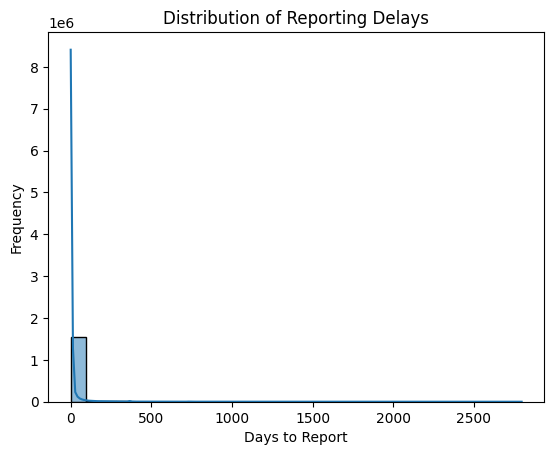

 * sqlite:///Crime_analyze.db
Done.


In [ ]:
crime=%sql select*from Crime_analyze_table  ;
data3=pd.DataFrame(crime)

data3['Date Occurred'] = pd.to_datetime(data3['Date Occurred'], errors='coerce', format='%m/%d/%Y')
data3['Date Reported'] = pd.to_datetime(data3['Date Reported'], errors='coerce', format='%m/%d/%Y')

# Calculate the difference in the days
data3['Reporting Delay (Days)'] = (data3['Date Reported'] - data3['Date Occurred']).dt.days
sns.histplot(data3['Reporting Delay (Days)'], bins=30, kde=True)
plt.title("Distribution of Reporting Delays")
plt.xlabel("Days to Report")
plt.ylabel("Frequency")
plt.show()

# Task 4:
Crime Codes that Occur Multiple Times so Filter for crime codes that occur more than once.


In [ ]:
%sql SELECT "Crime Code"as crime_code, COUNT(*) AS crime_count,"Crime Code Description" FROM Crime_analyze_table GROUP BY crime_code ORDER BY crime_count DESC;

 * sqlite:///Crime_analyze.db
Done.


crime_code,crime_count,Crime Code Description
624,145767,BATTERY - SIMPLE ASSAULT
510,121329,VEHICLE - STOLEN
330,121318,BURGLARY FROM VEHICLE
310,114751,BURGLARY
440,113709,THEFT PLAIN - PETTY ($950 & UNDER)
354,100653,THEFT OF IDENTITY
626,85908,INTIMATE PARTNER - SIMPLE ASSAULT
740,79433,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 0114"
745,71523,VANDALISM - MISDEAMEANOR ($399 OR UNDER)
230,67631,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT"


# Task 5:
Plot Between Victim Age and Sex.
- Are victims of a particular sex typically older or younger?
- What is the age range for each sex?

 * sqlite:///Crime_analyze.db
Done.


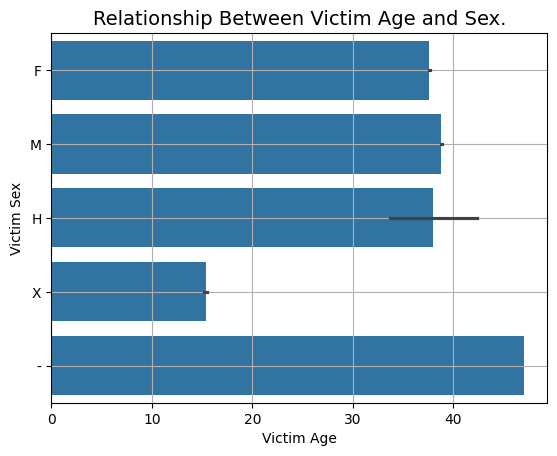

In [ ]:
crime=%sql select*from Crime_analyze_table  ;
data5=pd.DataFrame(crime)
plt.title("Relationship Between Victim Age and Sex.", fontsize=14)
plot =sns.barplot(x="Victim Age",y="Victim Sex", data=data5)


plt.grid()
plt.show()
